In [1]:
import pandas as pd

# WarmUpExercise

In [10]:
import numpy as np

In [11]:
np.zeros((4,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.ones((4,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [15]:
np.identity(5)*6

array([[6., 0., 0., 0., 0.],
       [0., 6., 0., 0., 0.],
       [0., 0., 6., 0., 0.],
       [0., 0., 0., 6., 0.],
       [0., 0., 0., 0., 6.]])

In [14]:
np.diag([1,3,5,7])

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 7]])

# Plotting the Data

In [16]:
import matplotlib.pyplot as plt

In [8]:
data=pd.read_table("/Users/yolanda/Desktop/吴恩达网课作业/machine-learning-ex1/ex1/ex1data1.txt",sep=",",names=["population","profit"])

In [9]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
m=len(data)
m

97

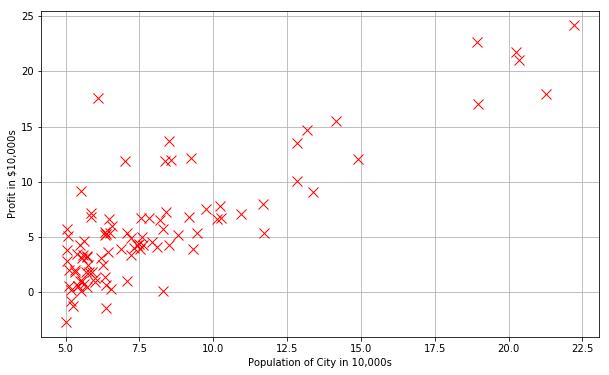

In [38]:
#plot the data
plt.figure(figsize=(10,6))
plt.plot(data["population"],data["profit"],"rx",markersize=10)
plt.grid(True) #Always plot.grid true!
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [41]:
data.insert(0,"X0",1)

In [42]:
data.head()

,X0,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


# Cost and Gradient Descent

In [43]:
#Some gradient descent settings
iterations = 1500
alpha = 0.01#learning rate

In [64]:
#linear function
def h(theta,X):
    return np.dot(X,theta)

In [65]:
#cost function
def J(theta,X,y):
    '''
    theta_star is the initial theta guess of n dimension
    X is mxn matrix
    y is mx1 vector
    theta is nx1 vector
    '''
    return sum((h(theta,X)-y)**2)/2/len(y)

In [51]:
X=data[["X0","population"]]

In [87]:
X.head()

,X0,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [70]:
y=data["profit"]

In [71]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [105]:
initial_theta=np.array([0]*X.shape[1])

In [106]:
initial_theta

array([0, 0])

In [107]:
J(initial_theta,X,y)

32.072733877455654

In [95]:
#Actual gradient descent minimizing routine
def descentgradient(X,y,initial_theta):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta=initial_theta
    jvec=[]#cost function of every theta
    thetahistory=[]#every theta
    for iteration in range(iterations):
        gradients=1/len(y)*np.dot(X.T,h(theta,X)-y)
        theta=theta-alpha*gradients
        #add theta
        thetahistory.append(theta)
        #add costfunction
        jvec.append(J(theta,X,y))
    return theta,thetahistory,jvec

In [108]:
#Actually run gradient descent to get the best-fit theta values
theta, thetahistory, jvec=descentgradient(X,y,initial_theta)

In [121]:
#plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,"bo")
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("iteration number")
    plt.ylabel("cost function")
    plt.ylim([4,7])
    plt.show()

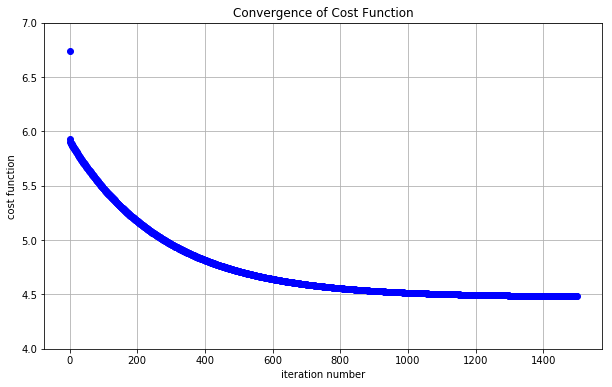

In [122]:
plotConvergence(jvec)

In [124]:
#hypothetic result
def myfit(xval):
    return np.dot(xval,theta)

In [125]:
y_fit=myfit(X)

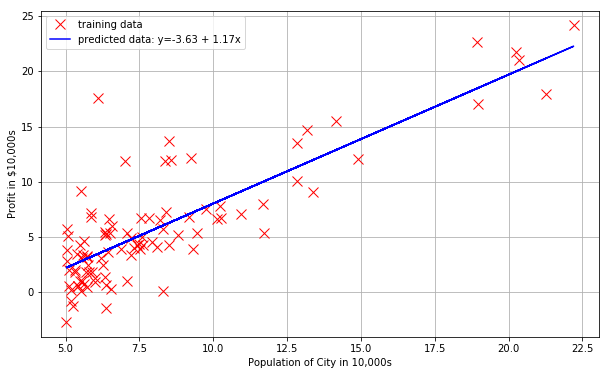

In [126]:
#plot the hypothetic y and the real y
plt.figure(figsize=(10,6))
plt.plot(X["population"],y,"rx",markersize=10,label="training data")
plt.plot(X["population"],y_fit,"b-",label="predicted data: y=%0.2f + %0.2fx"%(theta[0],theta[1]))
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

# Visualizing Cost Function

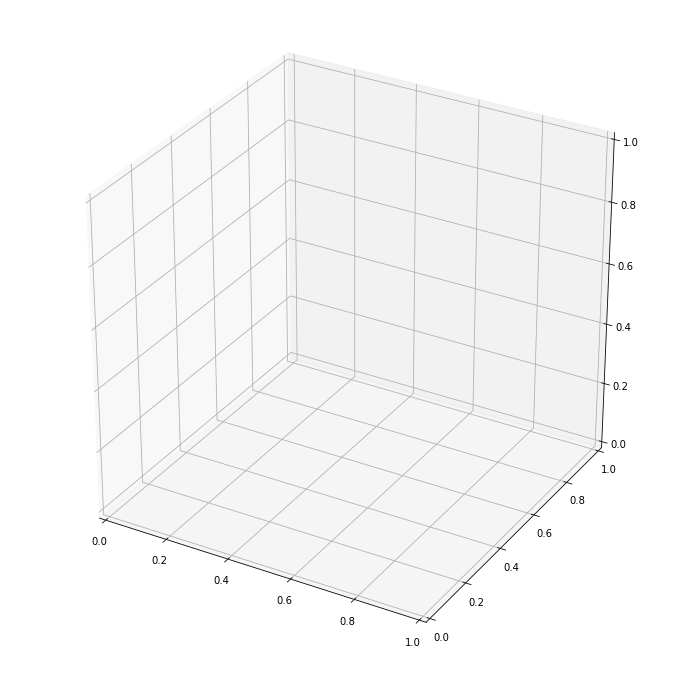

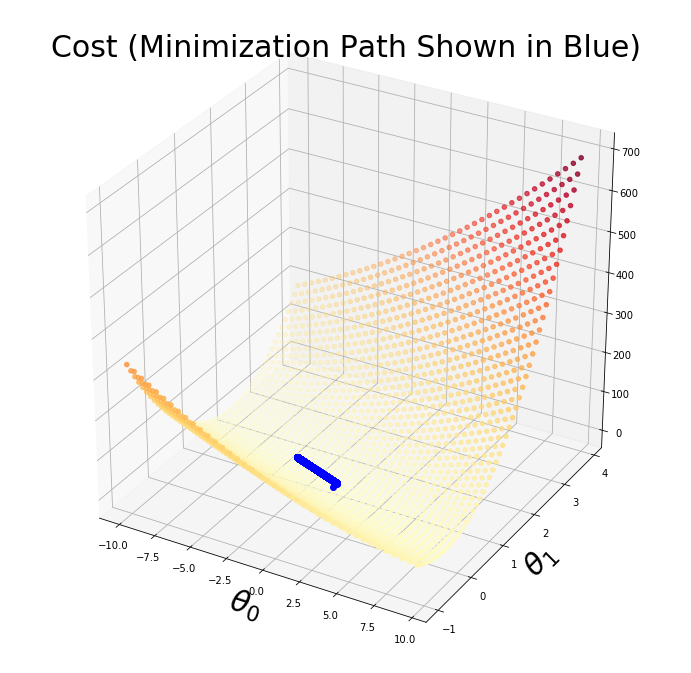

In [128]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(J(np.array([david,kaleko]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

# Multiple Variable Linear Regression

In [192]:
data=pd.read_table("/Users/yolanda/Desktop/吴恩达网课作业/machine-learning-ex1/ex1/ex1data2.txt",sep=",",names=["size","total_rooms","price"])

In [193]:
data.head()

,size,total_rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [194]:
m=len(data)
m

47

# Feature Scaling in different ways

In [145]:
#can find both statistic
data.describe()

,size,total_rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [146]:
#find some statistic chara
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy="mean")

In [147]:
imputer.fit(data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [148]:
imputer.statistics_

array([2.00068085e+03, 3.17021277e+00, 3.40412660e+05])

In [152]:
#can't use this to calculate std, only mean
imputer=Imputer(strategy="std")

In [153]:
imputer.fit(data)

ValueError: Can only use these strategies: ['mean', 'median', 'most_frequent']  got strategy=std

In [195]:
#can use this to calculate both
mean=data.mean().values

In [196]:
std=data.std().values

In [197]:
data["size"]=data["size"]-mean[0]

In [198]:
data["total_rooms"]=data["total_rooms"]-mean[1]

In [199]:
data["price"]=data["price"]-mean[2]

In [200]:
data["size"]=data["size"]/std[0]

In [201]:
data["total_rooms"]=data["total_rooms"]/std[1]

In [202]:
data["price"]=data["price"]/std[2]

In [203]:
data.head()

,size,total_rooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [186]:
data1=pd.read_table("/Users/yolanda/Desktop/吴恩达网课作业/machine-learning-ex1/ex1/ex1data2.txt",sep=",",names=["size","total_rooms","price"])

In [187]:
from sklearn.preprocessing import StandardScaler

In [188]:
scaler = StandardScaler()

In [189]:
scaler.fit(data1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [190]:
all=scaler.transform(data1)

In [191]:
all

array([[ 1.31415422e-01, -2.26093368e-01,  4.80890225e-01],
       [-5.09640698e-01, -2.26093368e-01, -8.49833796e-02],
       [ 5.07908699e-01, -2.26093368e-01,  2.31097448e-01],
       [-7.43677059e-01, -1.55439190e+00, -8.76398036e-01],
       [ 1.27107075e+00,  1.10220517e+00,  1.61263744e+00],
       [-1.99450507e-02,  1.10220517e+00, -3.27500639e-01],
       [-5.93588523e-01, -2.26093368e-01, -2.06242009e-01],
       [-7.29685755e-01, -2.26093368e-01, -1.14317510e+00],
       [-7.89466782e-01, -2.26093368e-01, -1.03807621e+00],
       [-6.44465993e-01, -2.26093368e-01, -7.91516995e-01],
       [-7.71822042e-02,  1.10220517e+00, -8.11734851e-01],
       [-8.65999486e-04, -2.26093368e-01,  5.32514582e-02],
       [-1.40779041e-01, -2.26093368e-01, -8.41830726e-02],
       [ 3.15099326e+00,  2.43050370e+00,  2.90606282e+00],
       [-9.31923697e-01, -2.26093368e-01, -6.50856985e-01],
       [ 3.80715024e-01,  1.10220517e+00,  8.85085658e-01],
       [-8.65782986e-01, -1.55439190e+00

In [206]:
X=data[["size","total_rooms"]]

In [207]:
y=data["price"]

In [208]:
X.head()

,size,total_rooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [209]:
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

# Plotting the normalized data

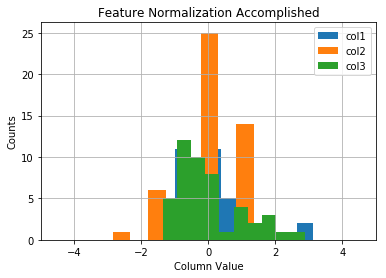

In [212]:
#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
plt.hist(X["size"],label = 'col1')
plt.hist(X["total_rooms"],label = 'col2')
plt.hist(y,label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Cost and Gradient Descent

In [213]:
X.insert(0,"X0",1)

In [214]:
initial_theta=np.array([0,0,0])

In [215]:
#Actually run gradient descent to get the best-fit theta values
theta, thetahistory, jvec=descentgradient(X,y,initial_theta)

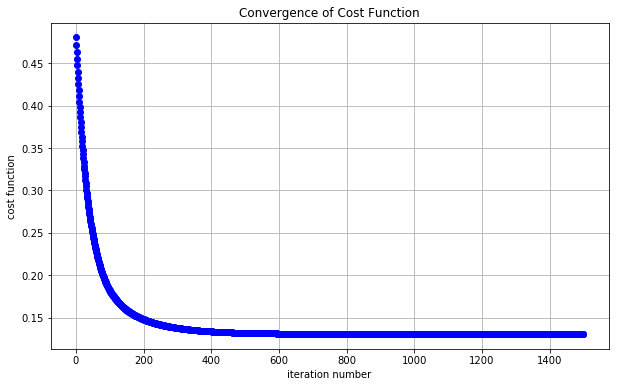

In [220]:
#注意原画图函数的坐标范围产生的影响
plotConvergence(jvec)

In [219]:
#plot the convergence of the cost function（坐标范围需修改）
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,"bo")
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("iteration number")
    plt.ylabel("cost function")
    plt.show()

In [222]:
#[1,1650.,3]
size=(1650-2000.680851)/794.702354
rooms=(3-3.170213)/0.760982

In [225]:
h(theta,[1,size,rooms])*125039.899586+340412.659574

293101.15525369503